In [6]:
#DS Assignment

#SVM

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
data1=pd.read_csv("/content/SalaryData_Train(1).csv")
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
data1.shape

(30161, 14)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
data1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data1[data1.duplicated()]
print(data1.duplicated().sum())

3258


In [13]:
df1=data1.drop_duplicates()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [14]:
# Checking Correlation between numerical function

correlation = data1.corr()
correlation

<ipython-input-14-88b74fd03755>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data1.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


<Axes: >

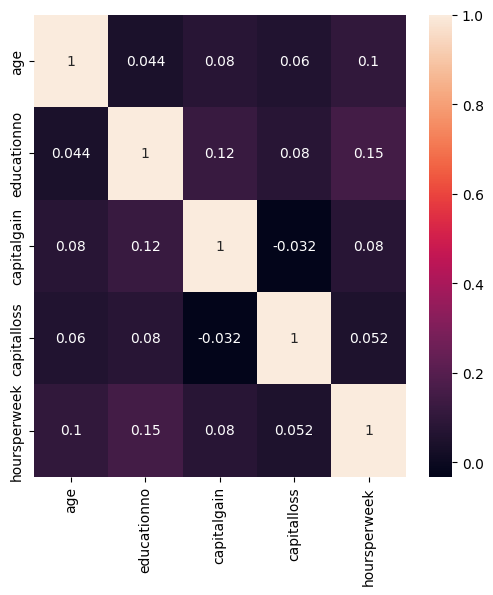

In [15]:
# creating heatmap by use of correlation

plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True)

<ipython-input-16-442293569793>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,2,1), sns.countplot(data=data1, y='workclass')];


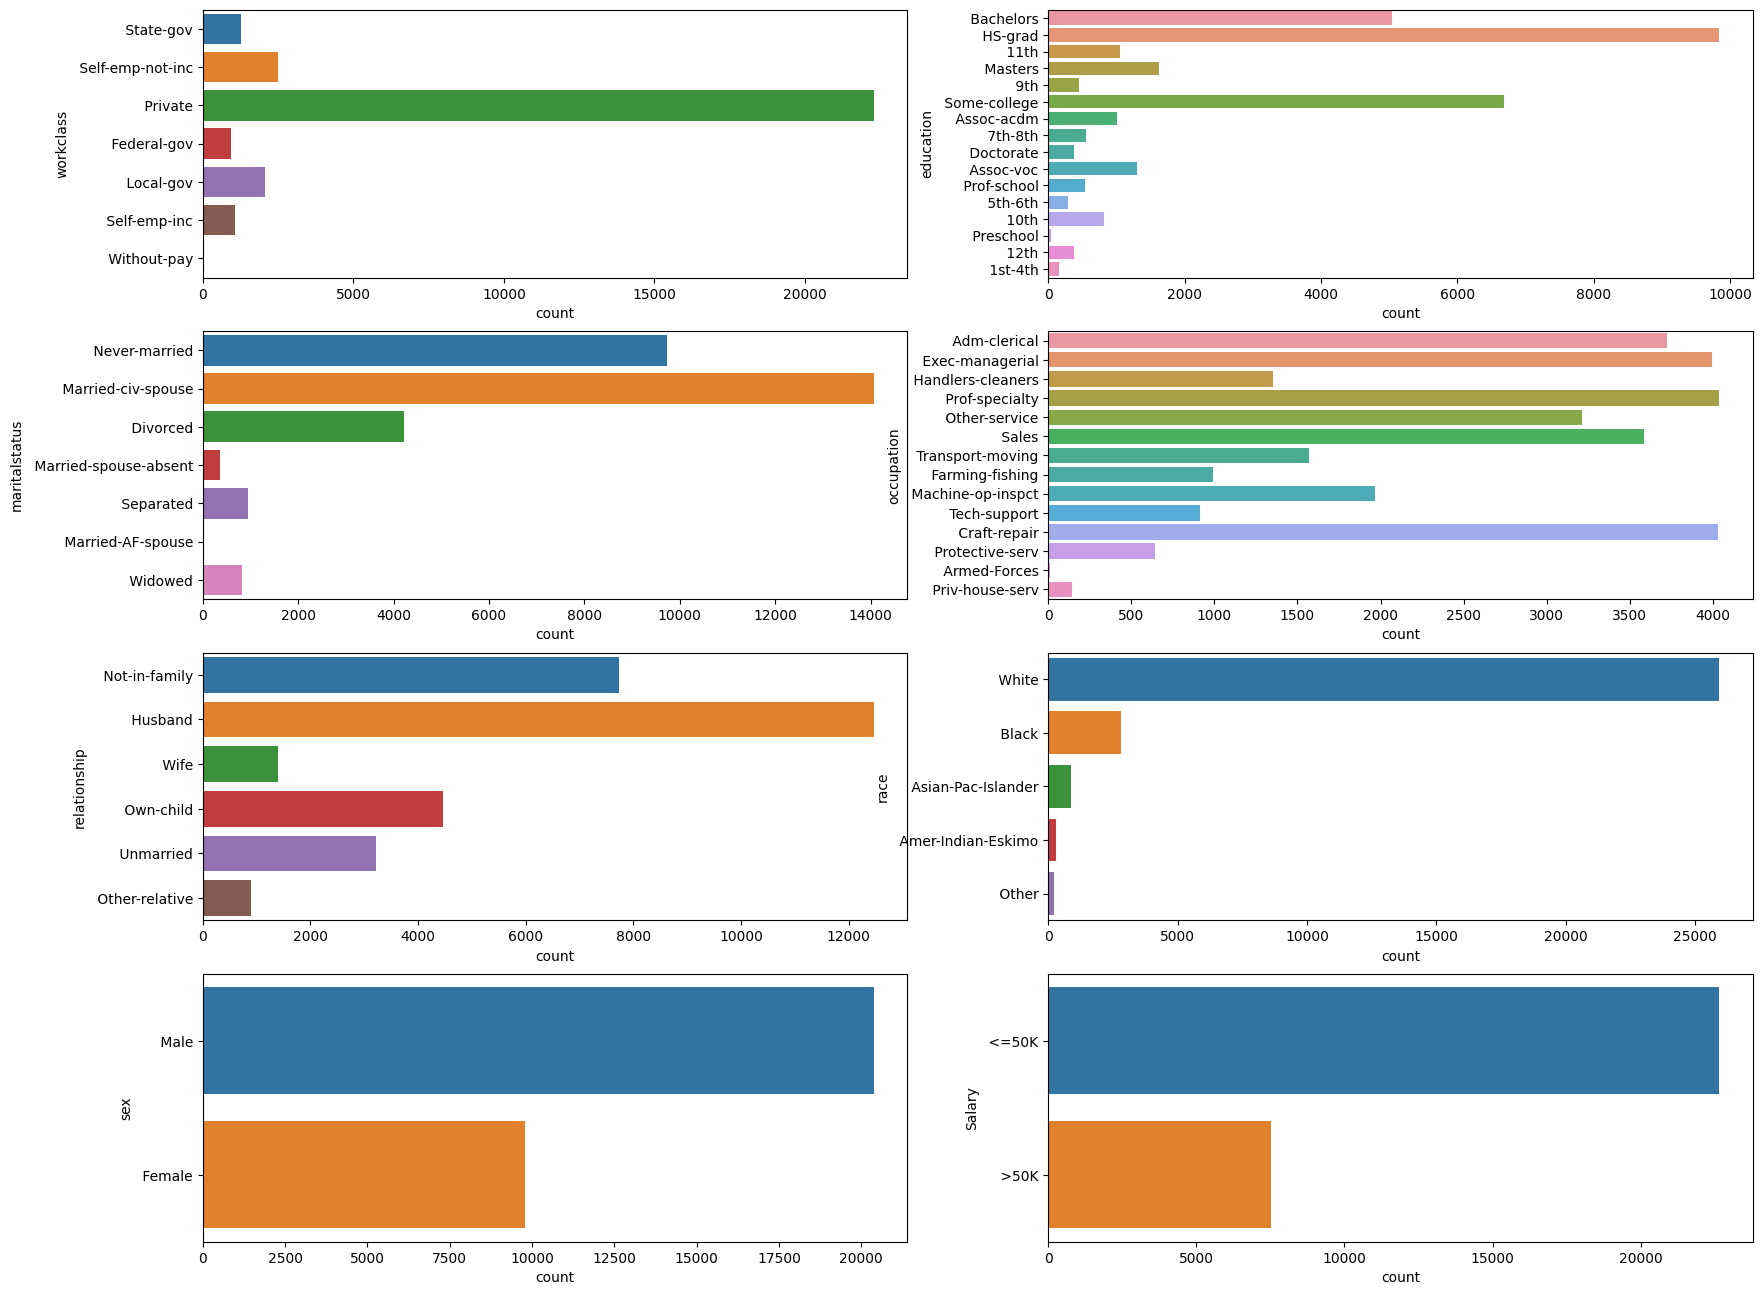

In [16]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=data1, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=data1, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=data1, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=data1, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=data1, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=data1, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=data1, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=data1, y='Salary')];

<Axes: xlabel='count', ylabel='native'>

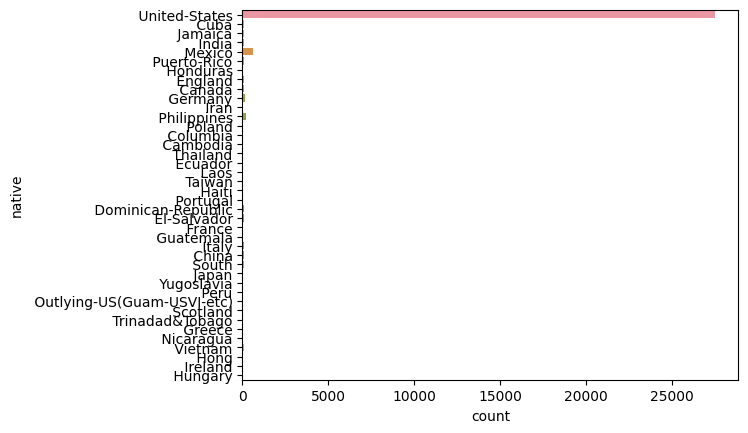

In [17]:
sns.countplot(data=data1, y='native')

In [18]:
data1['workclass'].unique(), data1['workclass'].value_counts()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             22285
  Self-emp-not-inc     2499
  Local-gov            2067
  State-gov            1279
  Self-emp-inc         1074
  Federal-gov           943
  Without-pay            14
 Name: workclass, dtype: int64)

In [19]:
data1['education'].unique(), data1['education'].value_counts()

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
  HS-grad         9840
  Some-college    6677
  Bachelors       5044
  Masters         1627
  Assoc-voc       1307
  11th            1048
  Assoc-acdm      1008
  10th             820
  7th-8th          557
  Prof-school      542
  9th              455
  12th             377
  Doctorate        375
  5th-6th          288
  1st-4th          151
  Preschool         45
 Name: education, dtype: int64)

In [20]:
data1['maritalstatus'].unique(), data1['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
  Married-civ-spouse       14065
  Never-married             9725
  Divorced                  4214
  Separated                  939
  Widowed                    827
  Married-spouse-absent      370
  Married-AF-spouse           21
 Name: maritalstatus, dtype: int64)

In [21]:
data1['occupation'].unique(), data1['occupation'].value_counts()


(array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
  Prof-specialty       4038
  Craft-repair         4030
  Exec-managerial      3992
  Adm-clerical         3721
  Sales                3584
  Other-service        3212
  Machine-op-inspct    1965
  Transport-moving     1572
  Handlers-cleaners    1350
  Farming-fishing       989
  Tech-support          912
  Protective-serv       644
  Priv-house-serv       143
  Armed-Forces            9
 Name: occupation, dtype: int64)

In [22]:
data1['relationship'].unique(), data1['relationship'].value_counts()


(array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
        ' Other-relative'], dtype=object),
  Husband           12463
  Not-in-family      7726
  Own-child          4466
  Unmarried          3212
  Wife               1406
  Other-relative      888
 Name: relationship, dtype: int64)

In [23]:
data1['race'].unique(), data1['race'].value_counts()


(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other'], dtype=object),
  White                 25932
  Black                  2817
  Asian-Pac-Islander      895
  Amer-Indian-Eskimo      286
  Other                   231
 Name: race, dtype: int64)

In [24]:
data1['sex'].unique(), data1['sex'].value_counts()


(array([' Male', ' Female'], dtype=object),
  Male      20380
  Female     9781
 Name: sex, dtype: int64)

In [25]:
data1['native'].unique(), data1['native'].value_counts()


(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary'], dtype=object),
  United-States                 27504
  Mexico                          610
  Philippines                     188
  Germany                         128
  Puerto-Rico                     109
  Canada                          107
  India                           100
  El-Salvador                     100
  Cuba                             92
  England                          86
  Jamaica       

In [26]:
data1['Salary'].unique(), data1['Salary'].value_counts()

(array([' <=50K', ' >50K'], dtype=object),
  <=50K    22653
  >50K      7508
 Name: Salary, dtype: int64)

<ipython-input-27-2ae84e847413>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-27-2ae84e847413>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-27-2ae84e847413>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-27-2ae84e847413>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-27-2ae84e847413>:6: F

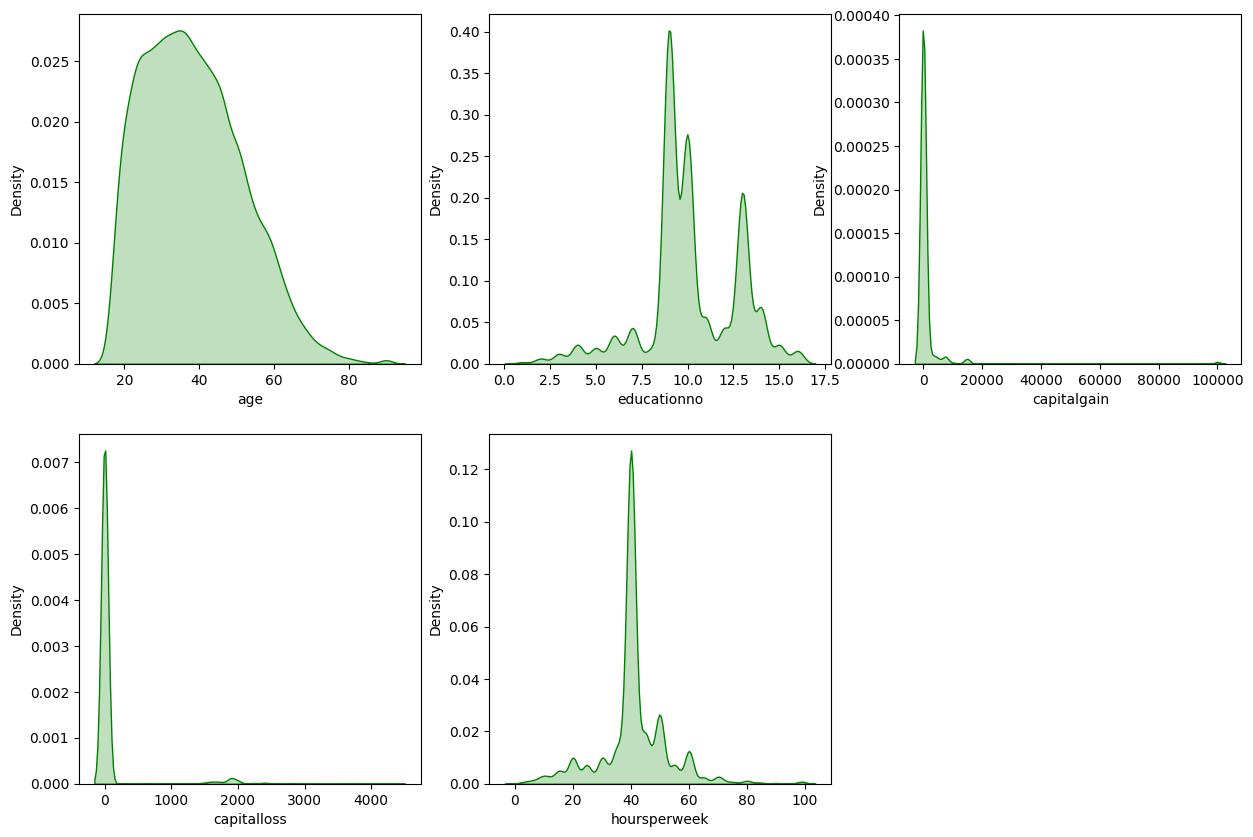

In [27]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(15,10))
for i,column in enumerate(no_columns,1):
    plt.subplot(2,3,i)
    sns.kdeplot(data1[column],color='g',shade=True)

In [28]:
# Convering values of "salary" column 

convert = {' >50K': 1, ' <=50K': 2}
df1 = df1.replace({'Salary': convert})

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [30]:
for i in columns:
    df1[i]= label_encoder.fit_transform(df1[i])
    
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,2
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,2
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,2


In [31]:
data2=pd.read_csv("/content/SalaryData_Test(1).csv")
data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [32]:
data2.shape

(15060, 14)

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [34]:
data2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [35]:
data2[data2.duplicated()]
print(data2.duplicated().sum())

930


In [36]:
df2=data2.drop_duplicates()
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [37]:
# Checking Correlation between numerical function

correlation2 = data2.corr()
correlation2

<ipython-input-37-331738c764a6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation2 = data2.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


<Axes: >

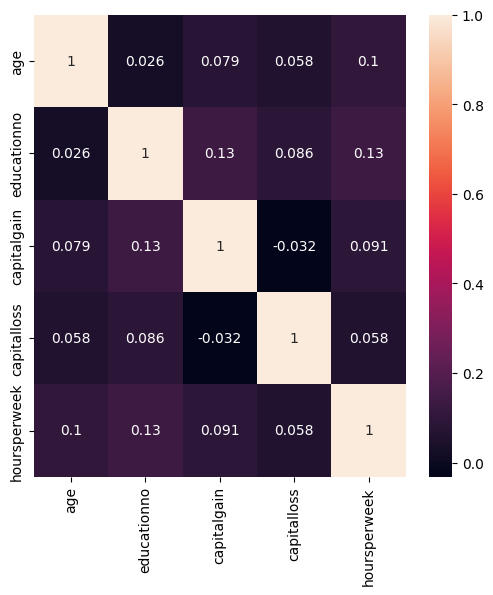

In [38]:
# creating heatmap by use of correlation

plt.figure(figsize=(6,6))
sns.heatmap(correlation2,annot=True)

<ipython-input-39-1c5acb90391a>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,2,1), sns.countplot(data=data2, y='workclass')];


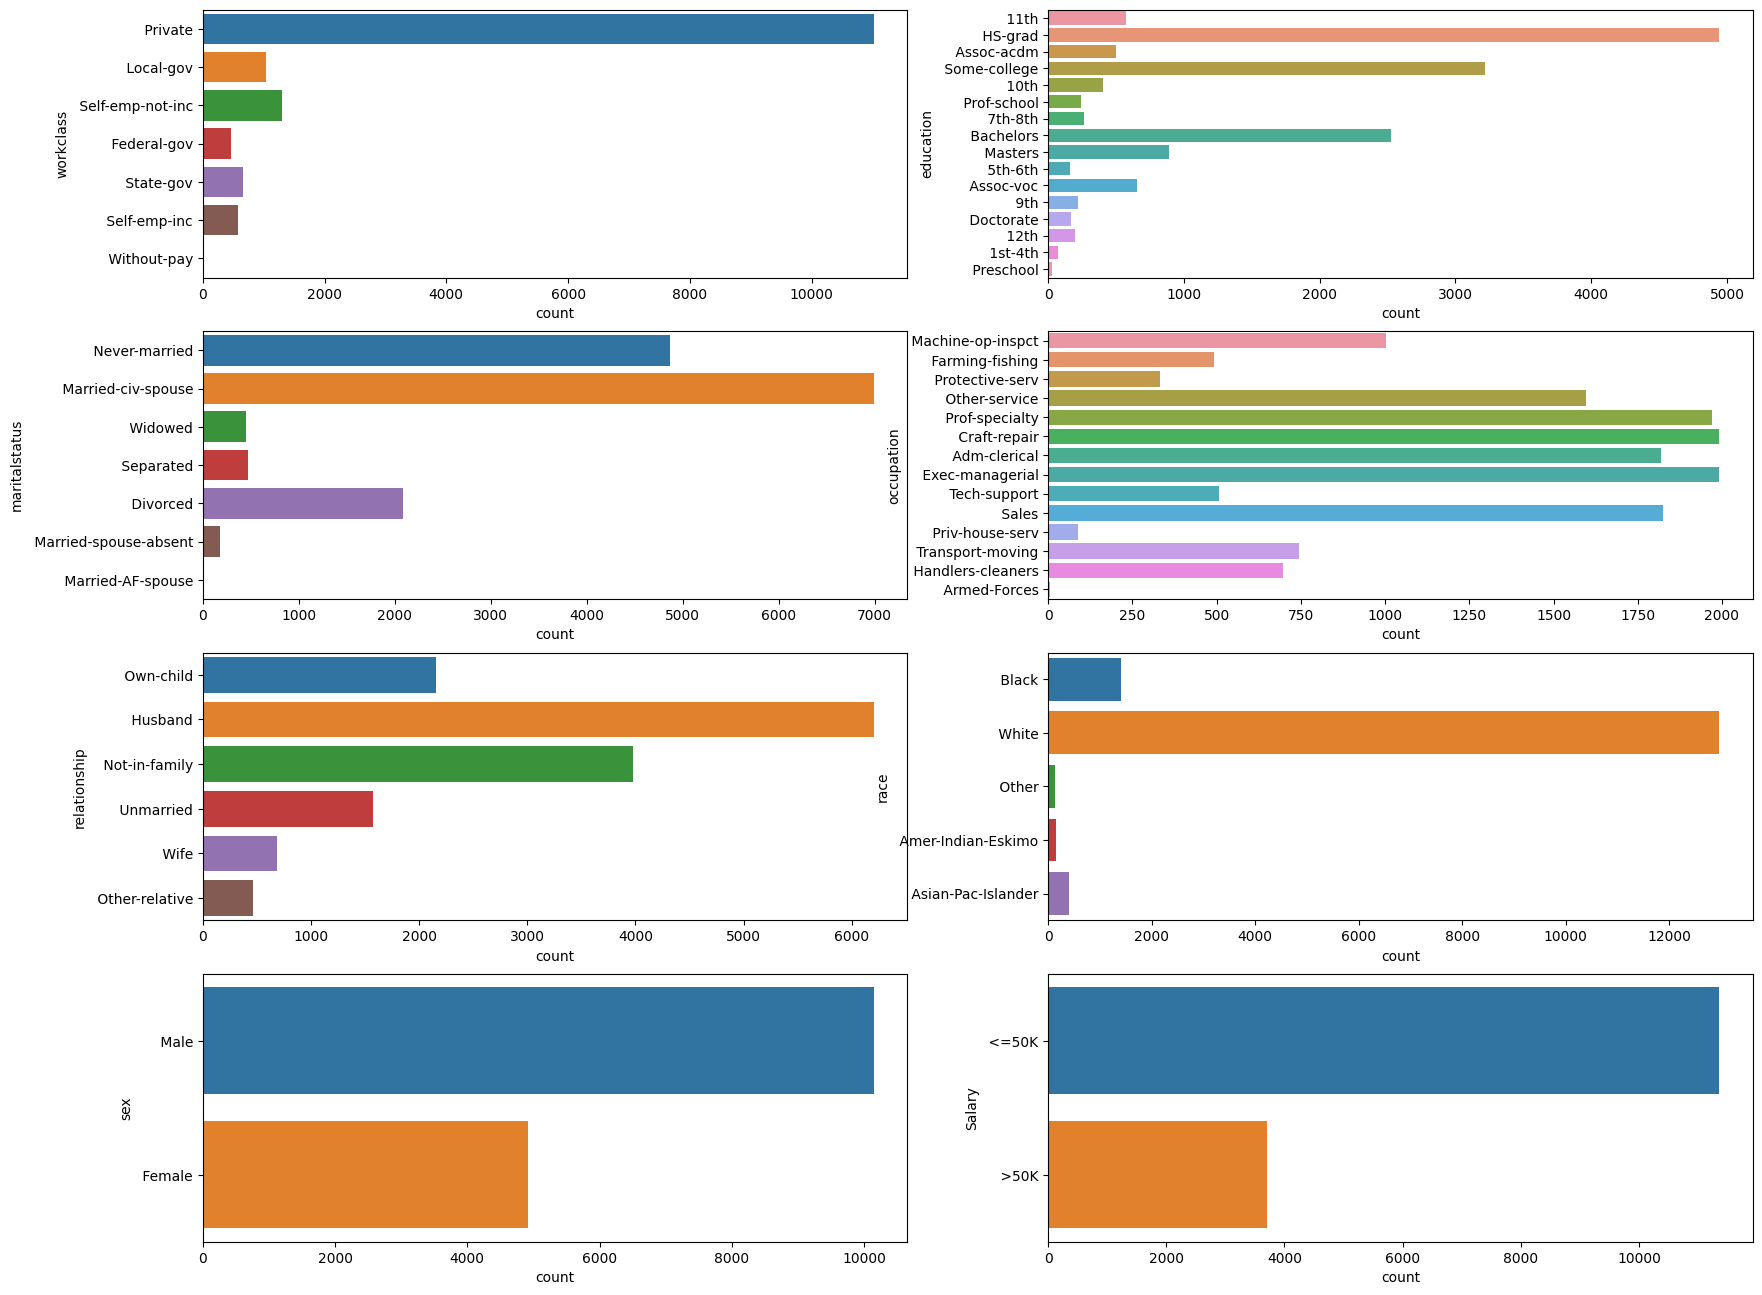

In [39]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=data2, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=data2, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=data2, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=data2, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=data2, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=data2, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=data2, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=data2, y='Salary')];


<ipython-input-40-e2aa69b1d6a6>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-40-e2aa69b1d6a6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2['age'],shade=True,color='g');


<Axes: xlabel='age'>

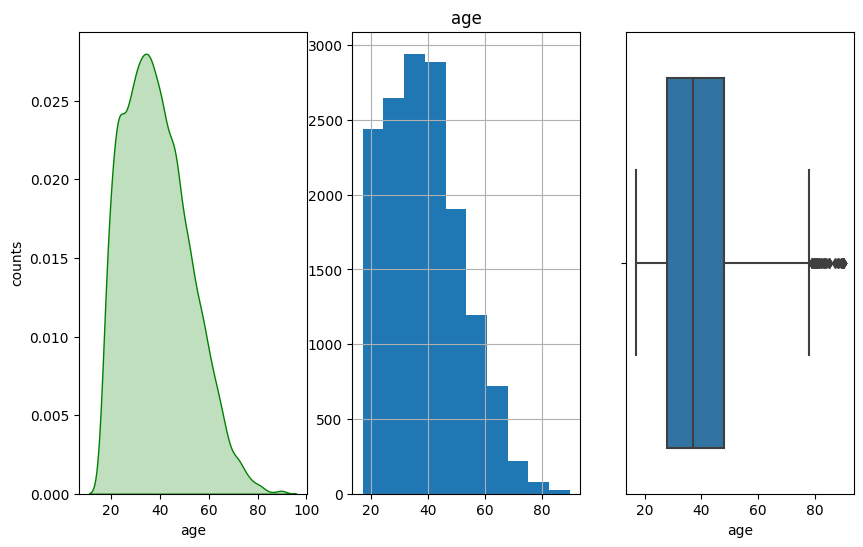

In [40]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(data2['age'],shade=True,color='g');
plt.xlabel('age');
plt.ylabel('counts')
plt.subplot(1,3,2)
data2['age'].hist()
plt.title("age")
plt.subplot(1,3,3)
sns.boxplot(x=data2["age"])

<ipython-input-41-4614f08c0f62>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-41-4614f08c0f62>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2['educationno'],shade=True,color='g');


<Axes: xlabel='educationno'>

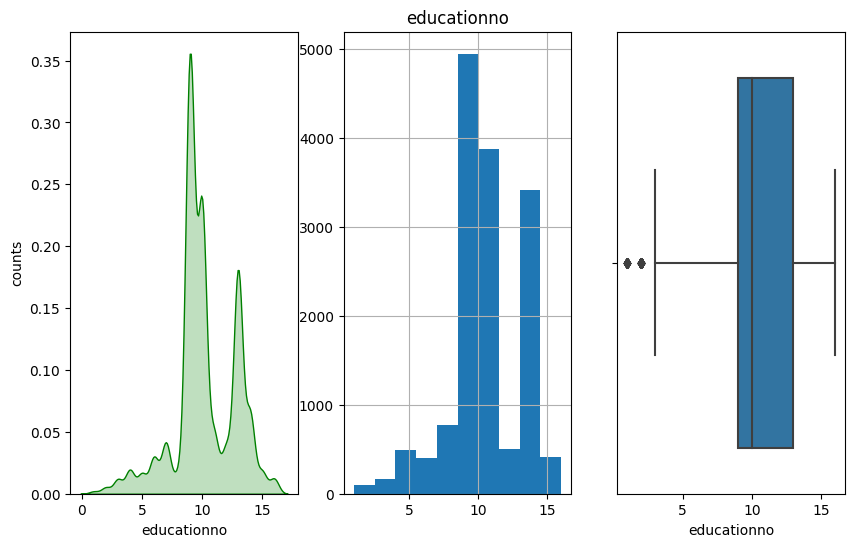

In [41]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(data2['educationno'],shade=True,color='g');
plt.xlabel('educationno');
plt.ylabel('counts')
plt.subplot(1,3,2)
data2['educationno'].hist()
plt.title("educationno")
plt.subplot(1,3,3)
sns.boxplot(x=data2["educationno"])

<ipython-input-42-01a4e4b559a5>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-42-01a4e4b559a5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2['capitalgain'],shade=True,color='g');


<Axes: xlabel='capitalgain'>

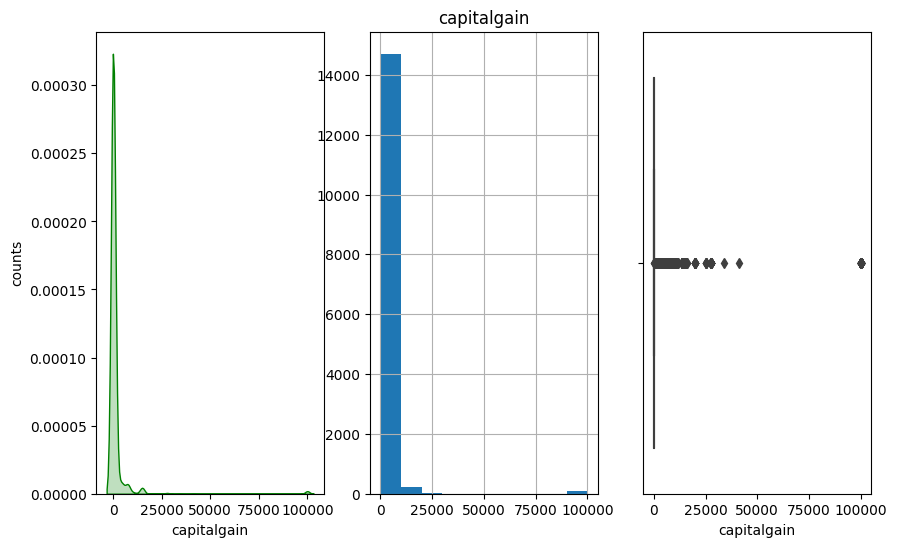

In [42]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(data2['capitalgain'],shade=True,color='g');
plt.xlabel('capitalgain');
plt.ylabel('counts')
plt.subplot(1,3,2)
data2['capitalgain'].hist()
plt.title("capitalgain")
plt.subplot(1,3,3)
sns.boxplot(x=data2["capitalgain"])

<ipython-input-43-108a88864595>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-43-108a88864595>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2['capitalloss'],shade=True,color='g');


<Axes: xlabel='capitalloss'>

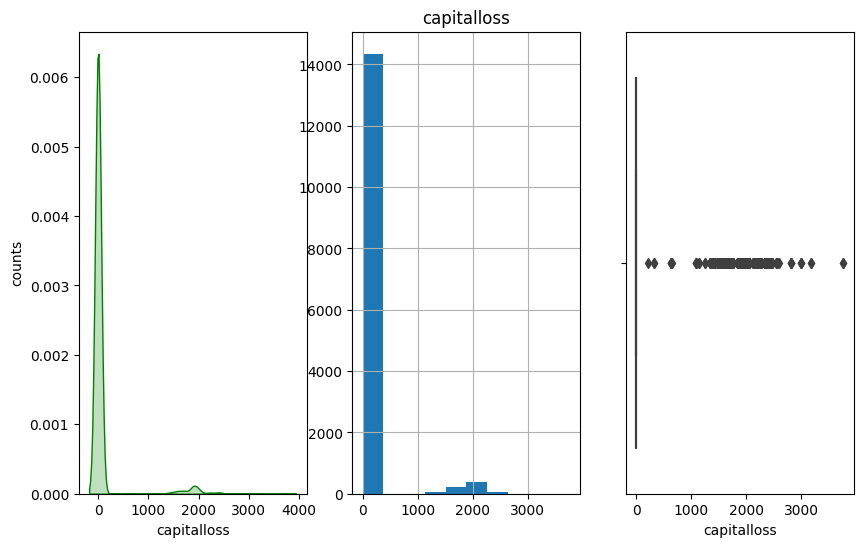

In [43]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(data2['capitalloss'],shade=True,color='g');
plt.xlabel('capitalloss');
plt.ylabel('counts')
plt.subplot(1,3,2)
data2['capitalloss'].hist()
plt.title("capitalloss")
plt.subplot(1,3,3)
sns.boxplot(x=data2["capitalloss"])

<ipython-input-44-de48679d6c97>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
<ipython-input-44-de48679d6c97>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2['hoursperweek'],shade=True,color='g');


<Axes: xlabel='hoursperweek'>

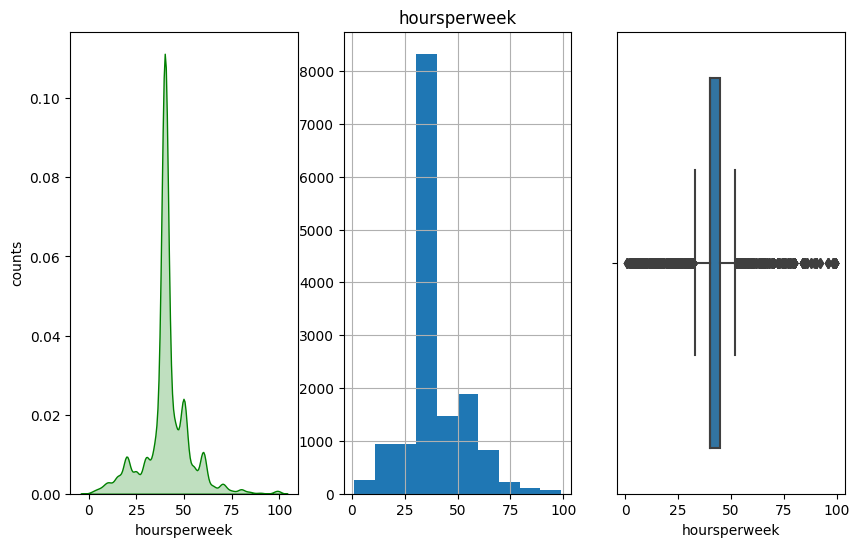

In [44]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(data2['hoursperweek'],shade=True,color='g');
plt.xlabel('hoursperweek');
plt.ylabel('counts')
plt.subplot(1,3,2)
data2['hoursperweek'].hist()
plt.title("hoursperweek")
plt.subplot(1,3,3)
sns.boxplot(x=data2["hoursperweek"])

In [45]:
for i in columns:
    df2[i]= label_encoder.fit_transform(df2[i])

<ipython-input-45-ac6b1726db27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]= label_encoder.fit_transform(df2[i])
<ipython-input-45-ac6b1726db27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i]= label_encoder.fit_transform(df2[i])
<ipython-input-45-ac6b1726db27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [46]:
df2 = df2.replace({'Salary': convert})
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,2
1,38,2,11,9,2,4,0,4,1,0,0,50,37,2
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,2


### Performing Suport Vector Machine Algorithm For Dataset

In [47]:
x_train=df1.iloc[:,0:13]
y_train=df1['Salary']

In [48]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37
30155,22,2,15,10,4,10,1,4,1,0,0,40,37
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37


In [49]:
y_train

0        2
1        2
2        2
3        2
4        2
        ..
30154    1
30155    2
30156    2
30158    2
30160    1
Name: Salary, Length: 26903, dtype: int64

In [50]:
x_test=df2.iloc[:,0:13]
y_test=df2['Salary']

In [51]:
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [52]:
y_test

0        2
1        2
2        1
3        1
4        2
        ..
15055    2
15056    2
15057    2
15058    2
15059    1
Name: Salary, Length: 14130, dtype: int64

# By Direct Use of SVC

### (1) kernel = rbf

In [53]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7960368011323425


Accuracy: 0.7960368011323425

### (4) kernel = sigmoid

In [54]:
model_linear = SVC(kernel = "sigmoid")
model_linear.fit(x_train,y_train)

print("Accuracy:",accuracy_score(y_test, pred_test_linear))

Accuracy: 0.7960368011323425


 Accuracy: 0.7544232130219392